# Exploring eBay Car Sales Data

To perform this analysis, we looked at a sample 50,000 data points from *eBay Kleinanzeigen*, a classifieds section of the German eBay website. The full dataset is [here](https://data.world/data-society/used-cars-data).

The column definitions are below:

|Name|Definition|
|:----|:----|
|dateCrawled|When this ad was first crawled. All field-values are taken from this date|
|name|Name of the car|
|seller|Whether the seller is private or a dealer|
|offerType|The type of listing|
|price|The price on the ad to sell the car|
|abtest|Whether the listing is included in an A/B test|
|vehicleType|The vehicle type|
|yearOfRegistration|The year in which the car was first registered|
|gearbox|The transmission type|
|powerPS|The power of the car in PS|
|model|The car model name|
|odometer|How many kilometers the car has driven|
|monthOfRegistration|The month in which the car was first registered|
|fuelType|What type of fuel the car uses|
|brand|The brand of the car|
|notRepairedDamage|If the car has a damage which is not yet repaired|
|dateCreated|The date on which the eBay listing was created|
|nrOfPictures|The number of pictures in the ad|
|postalCode|The postal code for the location of the vehicle|
|lastSeenOnline|When the crawler saw this ad last online|

In [2]:
# import packages

import pandas as pd
import numpy as np

In [3]:
# read in the data

autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [4]:
# explore the raw data

autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Initial notes on the raw data
* The data has 50,000 rows and 20 columns, as expected.
* Five columns have null values.
* Column names use camelCase
* The price and odometer columns have data type object and will likely need to be converted.
* The date columns also have data type object.
* notRepairedDamage has value "nein", maybe others
* name is messy, specific, words separated by underscores
* seller can be private ("privat")
* offerType has value "Angebot", maybe others

In [5]:
# update column names to be more descriptive and snake case

autos.rename(columns={'yearOfRegistration': 'registration_year', 
                      'monthOfRegistration': 'registration_month', 
                      'notRepairedDamage': 'unrepaired_damage', 
                      'dateCreated': 'ad_created',
                      'dateCrawled': 'date_crawled',
                      'offerType': 'offer_type',
                      'vehicleType': 'vehicle_type',
                      'powerPS': 'power_PS',
                      'fuelType': 'fuel_type',
                      'nrOfPictures': 'no_of_pics',
                      'postalCode': 'postal_code',
                      'lastSeen': 'last_seen'},
            inplace=True)

In [6]:
# explore the values

autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pics,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [7]:
# explore the columns with few values

for col in ['seller', 'offer_type', 'abtest', 'gearbox', 'odometer', 'fuel_type', 'unrepaired_damage', 'no_of_pics']:
    print('\n')
    print(col)
    print(autos[col].value_counts())
    



seller
privat        49999
gewerblich        1
Name: seller, dtype: int64


offer_type
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


abtest
test       25756
control    24244
Name: abtest, dtype: int64


gearbox
manuell      36993
automatik    10327
Name: gearbox, dtype: int64


odometer
150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64


fuel_type
benzin     30107
diesel     14567
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64


unrepaired_damage
nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64


no_of_pics
0    50000
Name: no_of_pics, dtype: int64


### Notes on column values
* Almost all sellers are privat. Almost all offer types are Angebots. All ads show 0 pictures. These columns can be dropped.
* Binary columns:
    * unrepaired_damage: nein/ja
    * abtest: test/control
    * gearbox: manuell/automatik
* Most odometer readings show the max value, 150,000. Maybe this is capped?
* price and odometer should be converted to numbers

In [8]:
# drop unecessary columns

autos.drop(columns=['seller', 'offer_type', 'no_of_pics'], axis=1, inplace=True)


In [9]:
# convert german binaries to english

unrepaired_dmg_dict = {'nein': 'N', 'ja': 'Y'}
gearbox_dict = {'manuell': 'manual', 'automatik': 'automatic'}

autos['unrepaired_damage'] = autos['unrepaired_damage'].map(unrepaired_dmg_dict)
autos['gearbox'] = autos['gearbox'].map(gearbox_dict)



In [10]:
# convert price and odometer to numerical columns

autos['price'] = autos['price'].str.replace('$', '').str.replace(',', '').astype(float)
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '').astype(float)
autos.rename(columns={'odometer': 'odometer_km'}, inplace=True)

                                                  

In [11]:
# explore the price and mileage columns

for col in ['price', 'odometer_km']:
    print('\n')
    print(col)
    print('\nNumber Unique Values')
    print(autos[col].unique().shape)
    print('\nDescribe')
    print(autos[col].describe())
    print('\nHigh Values')
    print(autos[col].value_counts().sort_index(ascending=False).head(20))
    print('\nLow Values')
    print(autos[col].value_counts().sort_index(ascending=True).head(20))



price

Number Unique Values
(2357,)

Describe
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

High Values
99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

Low Values
0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64


odometer_km

Number Unique Values
(13,)

Describe
count     50000.000000
mean     125732.

### Notes on price and odometer_km
* Prices might not all be in same denomination
* Prices 99,999,999 and 12,345,678 are probably not real
* Prices above 350,000 are likely outliers; steady increase until 350,000, then jump to 999,990. Remove these.
* Price of zero is inaccurate or useless
* A lot of odometer_km are 150,000, which is the max; possibly capped at 150,000

In [12]:
# remove price outliers

autos = autos[autos['price'] <= 350000]

In [13]:
# explore the datetime columns

for col in ['date_crawled', 'last_seen']:
    print('\n')
    print(col)
    print(autos[col].str[:10].value_counts(normalize=True, dropna=False).sort_index())

print('\nad_created')
print(autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index().head(60))
print(autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False).head(60))

print('\nregistration_year')
print(autos['registration_year'].describe())




date_crawled
2016-03-05    0.025387
2016-03-06    0.013944
2016-03-07    0.035970
2016-03-08    0.033269
2016-03-09    0.033209
2016-03-10    0.032129
2016-03-11    0.032489
2016-03-12    0.036770
2016-03-13    0.015564
2016-03-14    0.036630
2016-03-15    0.033990
2016-03-16    0.029508
2016-03-17    0.031509
2016-03-18    0.013064
2016-03-19    0.034910
2016-03-20    0.037831
2016-03-21    0.037490
2016-03-22    0.032909
2016-03-23    0.032389
2016-03-24    0.029108
2016-03-25    0.031749
2016-03-26    0.032489
2016-03-27    0.031049
2016-03-28    0.034850
2016-03-29    0.034150
2016-03-30    0.033629
2016-03-31    0.031909
2016-04-01    0.033809
2016-04-02    0.035410
2016-04-03    0.038691
2016-04-04    0.036490
2016-04-05    0.013104
2016-04-06    0.003181
2016-04-07    0.001420
Name: date_crawled, dtype: float64


last_seen
2016-03-05    0.001080
2016-03-06    0.004421
2016-03-07    0.005362
2016-03-08    0.007582
2016-03-09    0.009843
2016-03-10    0.010763
2016-03-11    0.01

### Notes on datetime columns
* date_crawled is evenly distributed between 3/05/2016 and 4/07/2016.
* ad_created is evenly distributed between 3/05/2016 and 4/07/2016, but contains several values between 6/11/2015 and 3/04/2016.
* last_seen contains dates between 3/05/2016 and 4/07/2016, but heavily skews toward 4/05/2016 - 4/07/2016.
* The min and max registration years are not years; they're 1000 and 9999. A car can't be registered after the ad was posted. Remove cars registered outside of 1900 - 2016.


In [14]:
# get the registration years that can't be accurate

autos = autos[autos['registration_year'].between(1900, 2016)]

autos['registration_year'].value_counts(normalize=True).sort_index().head(60)
autos['registration_year'].value_counts(normalize=True).sort_index(ascending=False).head(60)


2016    0.027408
2015    0.008310
2014    0.013850
2013    0.016786
2012    0.027553
2011    0.034030
2010    0.033260
2009    0.043673
2008    0.046464
2007    0.047984
2006    0.056377
2005    0.062792
2004    0.057002
2003    0.056794
2002    0.052753
2001    0.056273
2000    0.069852
1999    0.062438
1998    0.051087
1997    0.042236
1996    0.030073
1995    0.027324
1994    0.013745
1993    0.009268
1992    0.008122
1991    0.007414
1990    0.008226
1989    0.003770
1988    0.002957
1987    0.001562
1986    0.001583
1985    0.002166
1984    0.001104
1983    0.001104
1982    0.000896
1981    0.000625
1980    0.002020
1979    0.000729
1978    0.000979
1977    0.000458
1976    0.000562
1975    0.000396
1974    0.000500
1973    0.000521
1972    0.000729
1971    0.000562
1970    0.000937
1969    0.000396
1968    0.000541
1967    0.000562
1966    0.000458
1965    0.000354
1964    0.000250
1963    0.000187
1962    0.000083
1961    0.000125
1960    0.000687
1959    0.000146
1958    0.0000

### Notes on registration_year
* No cars registered in the 1900s before 1957
* Most cars were registered in the 1990s or later

In [15]:
# convert the datetime dates to integers

for col in ['date_crawled', 'last_seen', 'ad_created']:
    date_col = col + '_date_int'
    autos[date_col] = autos[col].str[:10].str.replace('-', '').astype(int)
    

In [16]:
# explore the brand column

autos_groupby = autos[['brand', 'price', 'odometer_km']].groupby('brand').agg(count=('price', 'count'), mean_px=('price', 'mean'), mean_km=('odometer_km', 'mean'))
autos_groupby.reset_index()

print('\nNumber of Brands')
print(len(autos_groupby))
print('\nMost Popular')
print(autos_groupby.sort_values('count', ascending=False).head())
print('\nMost Expensive')
print(autos_groupby.sort_values('mean_px', ascending=False).head(20))
print('\nLeast Expensive')
print(autos_groupby.sort_values('mean_px').head(20))



Number of Brands
40

Most Popular
               count      mean_px        mean_km
brand                                           
volkswagen     10185  5231.081983  128724.104075
bmw             5283  8102.536248  132431.383684
opel            5194  2876.716404  129223.142087
mercedes_benz   4579  8485.239572  130856.082114
audi            4149  9093.650036  129287.780188

Most Expensive
                count       mean_px        mean_km
brand                                             
porsche           293  44553.467577   97457.337884
land_rover         98  19108.091837  118010.204082
jeep              108  11434.750000  127546.296296
jaguar             76  11176.197368  120921.052632
sonstige_autos    523  10805.078394   87466.539197
mini              415  10460.012048   88602.409639
audi             4149   9093.650036  129287.780188
mercedes_benz    4579   8485.239572  130856.082114
bmw              5283   8102.536248  132431.383684
chevrolet         274   6488.981752   99251.8

In [17]:
# find the most popular brand/model

for col in ['brand', 'model']:
    autos[col].fillna('unknown', inplace=True)

autos['brand_model'] = autos['brand'] + '_' + autos['model']
autos['brand_model'].value_counts(normalize=True, dropna=False).sort_values(ascending=False)


volkswagen_golf       0.079453
bmw_3er               0.055981
volkswagen_polo       0.034926
opel_corsa            0.034259
opel_astra            0.028907
                        ...   
land_rover_unknown    0.000021
ford_b_max            0.000021
mini_unknown          0.000021
rover_rangerover      0.000021
rover_discovery       0.000021
Name: brand_model, Length: 330, dtype: float64

### Notes on brand
* porsche is easily the most expensive. They tend to have less mileage.
* Popular expensive brands include audis, mercedes benzes, and bmws.
* Popular inexpensive brands include opel and ford.
* volkswagen is the most popular brand, and its price tends to be towards the middle.
* The volkswagen golf is the most popular model - about 8% of the ads were for this model - followed by the bmw 3er with about 6% of ads.

In [25]:
# track mileage vs price

# group mileage by 25k km
autos['odometer_km_grp_int'] = (autos['odometer_km'] / 25000).astype(int) * 25000
for val in autos['odometer_km_grp_int'].astype(str).unique():
    if val == '150000':
        autos.loc[autos['odometer_km_grp'] == val, 'odometer_km_grp'] = '150000+'
    else:
        autos.loc[autos['odometer_km_grp'] == val, 'odometer_km_grp'] = val + '-' + str(int(val) + 25000)
    
autos_groupby_km = autos[['odometer_km_grp_int', 'odometer_km_grp', 'price']].groupby(['odometer_km_grp_int', 'odometer_km_grp']).agg(['count', 'min', 'max', 'mean'])
autos_groupby_km = autos_groupby_km.droplevel(axis=1, level=0).reset_index()
for col in autos_groupby_km.columns:
    if 'odometer' not in col:
        autos_groupby_km.rename(columns={col: col + '_px'}, inplace=True)
autos_groupby_km.sort_values('odometer_km_grp_int')



,odometer_km_grp_int,odometer_km_grp,count_px,min_px,max_px,mean_px
0,0,0-25000,1922,0.0,350000.0,13323.225286
1,25000,25000-50000,1569,0.0,220000.0,15918.337795
2,50000,50000-75000,3342,0.0,190000.0,12165.271993
3,75000,75000-100000,3092,0.0,105000.0,8903.513907
4,100000,100000-125000,2109,0.0,299000.0,7936.031769
5,125000,125000-150000,4959,0.0,129000.0,6086.207905
6,150000,150000+,31023,0.0,197000.0,3654.001451


No handles with labels found to put in legend.


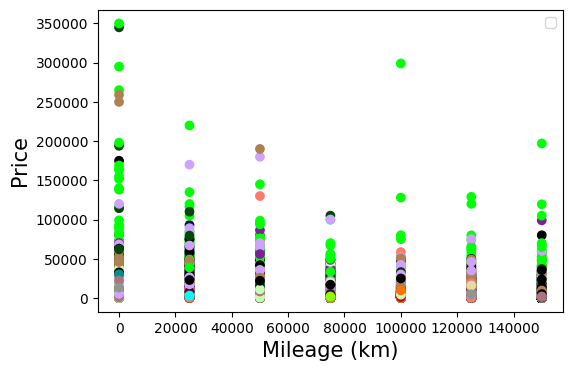

In [43]:
# plot prices by brand

import matplotlib.pyplot as plt
%matplotlib inline  

color_dict = {}
color_list = ['#ff028d', '#ad8150', '#c7fdb5', '#ffb07c', '#ff796c', '#e6daa6', '#0504aa', '#001146', '#cea2fd', '#000000', '#06470c', '#ae7181', '#35063e', '#01ff07', '#650021', '#6e750e', '#06c2ac', '#c79fef', '#00035b', '#d1b26f', '#00ffff', '#13eac9', '#75bbfd', '#929591', '#89fe05', '#bf77f6', '#9a0eea', '#033500', '#95d0fc', '#029386', '#f97306', '#96f97b', '#c20078', '#ffff14', '#7e1e9c', '#15b01a', '#0343df', '#ff81c0', '#653700', '#e50000', '#d0fefe']
color_no = 0
for brand in autos['brand'].unique():
    color_dict[brand] = color_list[color_no]
    color_no += 1
    
autos['brand_color'] = autos['brand'].map(color_dict)

fig, ax = plt.subplots()
ax.scatter(autos['odometer_km_grp_int'], autos['price'], c=autos['brand_color'])

ax.set_xlabel(r'Mileage (km)', fontsize=15)
ax.set_ylabel(r'Price', fontsize=15)

plt.show()

### Notes on mileage vs. price
* Price tends to decrease as mileage increases.
* There are exceptions.

In [29]:
# explore prices by damage

autos_groupby_dmg = autos[['unrepaired_damage', 'price']].groupby('unrepaired_damage').agg(['count', 'min', 'max', 'mean'])
autos_groupby_dmg = autos_groupby_dmg.droplevel(axis=1, level=0).reset_index()
for col in autos_groupby_km.columns:
    if 'unrepaired' not in col:
        autos_groupby_dmg.rename(columns={col: col + '_px'}, inplace=True)
autos_groupby_dmg
        

,unrepaired_damage,count,min,max,mean
0,N,34249,0.0,350000.0,7077.225496
1,Y,4784,0.0,44200.0,2126.840092


### Notes on unrepaired_damage
* On average, cars with unrepaired damage are priced at $5,000 less than cars needing no fixes